# DS 7331 Data Mining: Lab 1 iPython Notebook

### Created On: January 19, 2019
### Authors:  
####                 Arora, Tanvi                
####                 Chandna, Rajat
####                 Henderson Kuns, Nicol
####                 Ramasundaram, Kumar
####                 Vasquez, James


# Data Quality

In [1]:
# Importing the needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)

# To display plots inside the iPython Notebook itself
%matplotlib inline

In [2]:
# To verify how data is orgainzed in file(to find the delimiter) and then
# use corresponding function to open the file. eg
# data could be in .csv. .tsv, excel format etc.
pathOfDataFile = "data/bank-full.csv"
firstFewLines = list()
noOfLinesToView = 5

with open(pathOfDataFile) as dataFile:
    firstFewLines = [next(dataFile) for i in range(noOfLinesToView)]
    for line in firstFewLines:
        print(line)

"age";"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"

58;"management";"married";"tertiary";"no";2143;"yes";"no";"unknown";5;"may";261;1;-1;0;"unknown";"no"

44;"technician";"single";"secondary";"no";29;"yes";"no";"unknown";5;"may";151;1;-1;0;"unknown";"no"

33;"entrepreneur";"married";"secondary";"no";2;"yes";"yes";"unknown";5;"may";76;1;-1;0;"unknown";"no"

47;"blue-collar";"married";"unknown";"no";1506;"yes";"no";"unknown";5;"may";92;1;-1;0;"unknown";"no"



In [3]:
# Import the semi-colon delimited data file into pandas dataFrame
bankPromo_df = pd.read_csv(pathOfDataFile, sep = ";")

# Rename the Target/Final Outcome column from "y" to "Subscribed" as based on data description.
bankPromo_df = bankPromo_df.rename(columns={"y":"Subscribed"})

bankPromo_df.head(7)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no


In [8]:
# Single hot encoding
bankPromo_imputed  = pd.get_dummies(data = bankPromo_df, columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome'], prefix=['job', 'maritalt', 'education', 'contact', 'month', 'poutcome'], drop_first = True)

# replace the current default, housing, and loan atribute with something slightly more intuitive and readable
bankPromo_imputed['IsDefaulted'] = bankPromo_imputed.default=='yes' 
bankPromo_imputed.IsDefaulted = bankPromo_imputed.IsDefaulted.astype(np.int)

bankPromo_imputed['HasHousingLoan'] = bankPromo_imputed.housing=='yes' 
bankPromo_imputed.HasHousingLoan = bankPromo_imputed.HasHousingLoan.astype(np.int)

bankPromo_imputed['HasPerLoan'] = bankPromo_imputed.loan=='yes' 
bankPromo_imputed.HasPerLoan = bankPromo_imputed.HasPerLoan.astype(np.int)

#bankPromo_imputed['ageRange'] = pd.cut(bankPromo_imputed.age,[0,30,40,50,60,1e6],4,labels=[0,1,2,3,4]) # this creates a new variable
#bankPromo_imputed.ageRange = bankPromo_imputed.ageRange.astype(np.int)
bankPromo_imputed.info()
()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 46 columns):
age                    45211 non-null int64
default                45211 non-null object
balance                45211 non-null int64
housing                45211 non-null object
loan                   45211 non-null object
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
Subscribed             45211 non-null object
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_une

()

In [9]:
# Now let's clean up the dataset and delete default, housing, and loan
if 'default' in bankPromo_imputed:
    del bankPromo_imputed['default'] # if 'default' column still exists, delete it (as we created an ismale column)
    
if 'housing' in bankPromo_imputed:    
    del bankPromo_imputed['housing'] # get reid of the original category as it is now one-hot encoded

if 'loan' in bankPromo_imputed:    
    del bankPromo_imputed['loan'] # get reid of the original category as it is now one-hot encoded

bankPromo_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
age                    45211 non-null int64
balance                45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
Subscribed             45211 non-null object
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
maritalt_married       45211 non-null uint8
maritalt_s

In [10]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'Subscribed' in bankPromo_imputed:
    y = bankPromo_imputed['Subscribed'].values # get the labels we want
    del bankPromo_imputed['Subscribed'] # get rid of the class label
    X = bankPromo_imputed.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [11]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
  #  acc = mt.accuracy_score(y_test,y_hat)
   # conf = mt.confusion_matrix(y_test,y_hat)
   # print("====Iteration",iter_num," ====")
    #print("accuracy", acc )
    #print("confusion matrix\n",conf)
    iter_num+=1

In [12]:
# this does the exact same thing as the above block of code, but with shorter syntax

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    lr_clf.fit(X[train_indices],y[train_indices])  # train object
    y_hat = lr_clf.predict(X[test_indices]) # get test set precitions

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num," ====")
    print("accuracy", mt.accuracy_score(y[test_indices],y_hat)) 
    print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat))
# and here is an even shorter way of getting the accuracies for each training and test set
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

====Iteration 0  ====
accuracy 0.9018024991706293
confusion matrix
 [[7786  193]
 [ 695  369]]
====Iteration 1  ====
accuracy 0.9015813336282207
confusion matrix
 [[7800  202]
 [ 688  353]]
====Iteration 2  ====
accuracy 0.8991485126617274
confusion matrix
 [[7744  205]
 [ 707  387]]
[0.90346124 0.9050094  0.90091784]


In [13]:
# here we can change some of the parameters interactively
from ipywidgets import widgets as wd

def lr_explor(cost):
    lr_clf = LogisticRegression(penalty='l2', C=cost, class_weight=None) # get object
    accuracies = cross_val_score(lr_clf,X,y=y,cv=cv_object) # this also can help with parallelism
    print(accuracies)

wd.interact(lr_explor,cost=(0.001,5.0,0.05),__manual=True)

interactive(children=(FloatSlider(value=2.451, description='cost', max=5.0, min=0.001, step=0.05), Output()), …

<function __main__.lr_explor(cost)>

## Create Models

### SVM Models

#### Initial Model with rbf Kernel

In [14]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_curve, auc

In [17]:
%%time
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)

from sklearn.pipeline import Pipeline
# you can apply the StandardScaler function inside of the cross-validation loop 
#  but this requires the use of PipeLines in scikit. 
#  A pipeline can apply feature pre-processing and data fitting in one compact notation
#  Here is an example!
# okay, so run through the cross validation loop and set the training and testing variable for one single iteration
scl_obj = StandardScaler()

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    for train_indices, test_indices in cv_object.split(X,y): 
        # I will create new variables here so that it is more obvious what 
        # the code is doing (you can compact this syntax and avoid duplicating memory,
        # but it makes this code less readable)
        X_train = X[train_indices]
        y_train = y[train_indices]
        X_test = X[test_indices]
        y_test = y[test_indices]
        #sm = SMOTE(random_state = 12, ratio = 1.0)
        #x_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    scl_obj.fit(X_train)
    X_train_scaled = scl_obj.transform(X_train) # apply to training
    X_test_scaled = scl_obj.transform(X_test) 
    svm_clf = SVC(C=10, kernel='rbf', degree=3, gamma=0.01) # get object
    svm_clf.fit(X_train_scaled, y_train)  # train object
    y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    prec = mt.precision_score(y_test,y_hat, pos_label = 'yes')
    recl = mt.recall_score(y_test,y_hat, pos_label = 'yes')
    f1s = mt.f1_score(y_test, y_hat, pos_label = 'yes')
    print('Recall', recl)
    print('Precision', prec)
    print('accuracy:', acc )
    print('F1 Score:', f1s)
    print(conf)

C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Recall 0.32831608654750705
Precision 0.6609848484848485
accuracy: 0.901249585314608
F1 Score: 0.43871778755499685
[[7801  179]
 [ 714  349]]


C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Recall 0.37628384687208216
Precision 0.6376582278481012
accuracy: 0.900807254229791
F1 Score: 0.4732824427480915
[[7743  229]
 [ 668  403]]


C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Recall 0.39444995044598613
Precision 0.6337579617834395
accuracy: 0.9069998894172288
F1 Score: 0.4862553451435553
[[7804  230]
 [ 611  398]]
Wall time: 2min 38s


SVM also used the imputed data sets. We used two different kernels - rbf and poly. The data set is not linearly separable. So Radial Basis Function (RBF) and polynomial (poly) were tried. There were challenges in buidling a good model. The dataset is not balanced and has 89% of non-subscribed versus just 11% of subscribed. Since it is not balanced, in addition to accuracy score, recall and precision were considered in the model performance. The very first model had a decent accuracy of nearly 90%, but both recall and precision were very low (<50%). 

GridSearchCV was performed for rbf and poly kernels. In the grid search for poly kernel, 0.1, 1, 10, 100, 500 and 1000 were used along with gamma values of 0.01, 0.1 and 1.0. Grid search returned 100 for C and 0.01 for gamma. 

#### Initial model with poly kernel

In [24]:

%%time
# running poly kernel on original sample size
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)

from sklearn.pipeline import Pipeline
# you can apply the StandardScaler function inside of the cross-validation loop 
#  but this requires the use of PipeLines in scikit. 
#  A pipeline can apply feature pre-processing and data fitting in one compact notation
#  Here is an example!
# okay, so run through the cross validation loop and set the training and testing variable for one single iteration
scl_obj = StandardScaler()

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    for train_indices, test_indices in cv_object.split(X,y): 
        # I will create new variables here so that it is more obvious what 
        # the code is doing (you can compact this syntax and avoid duplicating memory,
        # but it makes this code less readable)
        X_train = X[train_indices]
        y_train = y[train_indices]
        X_test = X[test_indices]
        y_test = y[test_indices]
        #sm = SMOTE(random_state = 12, ratio = 1.0)
        #x_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    scl_obj.fit(X_train)
    X_train_scaled = scl_obj.transform(X_train) # apply to training
    X_test_scaled = scl_obj.transform(X_test) 
    svm_clf = SVC(C=10, kernel='poly', degree=3, gamma=0.01) # get object
    svm_clf.fit(X_train_scaled, y_train)  # train object
    y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    prec = mt.precision_score(y_test,y_hat, pos_label = 'yes')
    recl = mt.recall_score(y_test,y_hat, pos_label = 'yes')
    f1s = mt.f1_score(y_test, y_hat, pos_label = 'yes')
    print('Recall', recl)
    print('Precision', prec)
    print('accuracy:', acc )
    print('F1 Score:', f1s)
    print(conf)

C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Recall 0.3330316742081448
Precision 0.6891385767790262
accuracy: 0.9001437576025655
F1 Score: 0.44905430140329466
[[7772  166]
 [ 737  368]]


C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Recall 0.29206049149338376
Precision 0.6306122448979592
accuracy: 0.8971580227800509
F1 Score: 0.39922480620155043
[[7804  181]
 [ 749  309]]


C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Recall 0.2985781990521327
Precision 0.6481481481481481
accuracy: 0.8992590954329316
F1 Score: 0.408825438027255
[[7817  171]
 [ 740  315]]
Wall time: 2min 22s


#### GridSearch for SVM

In [ ]:
# this code took more than seven hours and still did not finish. 
from sklearn.datasets import load_iris
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
model_to_set = OneVsRestClassifier(SVC(kernel="poly"))

parameters = {
    "estimator__C": [0.1, 1, 10, 100, 500, 1000],
    "estimator__kernel": ['linear', 'rbf', 'poly', 'sigmoid'],
    "estimator__degree":[1, 2, 3, 4],
}

model_tunning = GridSearchCV(model_to_set, param_grid=parameters,cv = 3, n_jobs = -1)

model_tunning.fit(X, y)

print(model_tunning.best_score_)
print (model_tunning.best_params_)

#### Model using parameters from GridSearchCV

##### Poly Kernel

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
def svc_param_selection(X, y, nfolds):
    Cs = [0.1, 1, 10, 100, 500, 1000]
    gammas = [0.01, 0.1, 1.0]
    degrees = [3]
    param_grid = {'C': Cs, 'gamma' : gammas, 'degree' : degrees }
    grid_search = GridSearchCV(svm.SVC(kernel='poly'), param_grid, cv=nfolds, n_jobs = -1)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [77]:
svc_param_selection(X_train_scaled, y_train, 3)

{'C': 100, 'degree': 3, 'gamma': 0.01}

In [94]:
%%time
# running poly kernel on original sample size
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)

from sklearn.pipeline import Pipeline
# you can apply the StandardScaler function inside of the cross-validation loop 
#  but this requires the use of PipeLines in scikit. 
#  A pipeline can apply feature pre-processing and data fitting in one compact notation
#  Here is an example!
# okay, so run through the cross validation loop and set the training and testing variable for one single iteration
scl_obj = StandardScaler()

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    for train_indices, test_indices in cv_object.split(X,y): 
        # I will create new variables here so that it is more obvious what 
        # the code is doing (you can compact this syntax and avoid duplicating memory,
        # but it makes this code less readable)
        X_train = X[train_indices]
        y_train = y[train_indices]
        X_test = X[test_indices]
        y_test = y[test_indices]
        #sm = SMOTE(random_state = 12, ratio = 1.0)
        #x_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    scl_obj.fit(X_train)
    X_train_scaled = scl_obj.transform(X_train) # apply to training
    X_test_scaled = scl_obj.transform(X_test) 
    svm_clf = SVC(C=100, kernel='poly', degree=3, gamma=0.01) # get object
    svm_clf.fit(X_train_scaled, y_train)  # train object
    y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    prec = mt.precision_score(y_test,y_hat, pos_label = 'yes')
    recl = mt.recall_score(y_test,y_hat, pos_label = 'yes')
    f1s = mt.f1_score(y_test, y_hat, pos_label = 'yes')
  #  auc = mt.roc_curve(y,y_hat, pos_label='yes')
  #  print("AUC", auc)
    print('Recall', recl)
    print('Precision', prec)
    print('accuracy:', acc )
    print('F1 Score:', f1s)
    print(conf)

Recall 0.3679060665362035
Precision 0.5856697819314641
accuracy: 0.8991485126617274
F1 Score: 0.45192307692307687
[[7755  266]
 [ 646  376]]
Recall 0.38693957115009747
Precision 0.594311377245509
accuracy: 0.9004755059161783
F1 Score: 0.4687131050767414
[[7746  271]
 [ 629  397]]
Recall 0.38926174496644295
Precision 0.5841726618705037
accuracy: 0.8976003538648678
F1 Score: 0.46720368239355586
[[7711  289]
 [ 637  406]]
Wall time: 4min 49s


In [ ]:
[fpr, lpr, threshold] = mt.roc_curve(y_test,y_hat)
auc = mt.auc(fpr, lpr)
print("AUC", auc)

#### Grid Search for rbf kernel

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
def svc_param_selection(X, y, nfolds):
    Cs = [0.1, 1, 10, 100, 500, 1000]
    gammas = [0.01, 0.1, 1.0]
    degrees = [3]
    param_grid = {'C': Cs, 'gamma' : gammas, 'degree' : degrees }
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds, n_jobs = -1)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [22]:
svc_param_selection(X_train_scaled, y_train, 3)

{'C': 10, 'degree': 3, 'gamma': 0.01}

In [24]:

%%time
# running poly kernel on original sample size
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)

from sklearn.pipeline import Pipeline
# you can apply the StandardScaler function inside of the cross-validation loop 
#  but this requires the use of PipeLines in scikit. 
#  A pipeline can apply feature pre-processing and data fitting in one compact notation
#  Here is an example!
# okay, so run through the cross validation loop and set the training and testing variable for one single iteration
scl_obj = StandardScaler()

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    for train_indices, test_indices in cv_object.split(X,y): 
        # I will create new variables here so that it is more obvious what 
        # the code is doing (you can compact this syntax and avoid duplicating memory,
        # but it makes this code less readable)
        X_train = X[train_indices]
        y_train = y[train_indices]
        X_test = X[test_indices]
        y_test = y[test_indices]
        #sm = SMOTE(random_state = 12, ratio = 1.0)
        #x_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    scl_obj.fit(X_train)
    X_train_scaled = scl_obj.transform(X_train) # apply to training
    X_test_scaled = scl_obj.transform(X_test) 
    svm_clf = SVC(C=10, kernel='poly', degree=3, gamma=0.01) # get object
    svm_clf.fit(X_train_scaled, y_train)  # train object
    y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    prec = mt.precision_score(y_test,y_hat, pos_label = 'yes')
    recl = mt.recall_score(y_test,y_hat, pos_label = 'yes')
    f1s = mt.f1_score(y_test, y_hat, pos_label = 'yes')
    print('Recall', recl)
    print('Precision', prec)
    print('accuracy:', acc )
    print('F1 Score:', f1s)
    print(conf)

C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Recall 0.31574158325750684
Precision 0.6402214022140221
accuracy: 0.8952781156695787
F1 Score: 0.42291285801340645
[[7749  195]
 [ 752  347]]


C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Recall 0.3110435663627153
Precision 0.6356107660455487
accuracy: 0.9053411478491651
F1 Score: 0.41768707482993195
[[7880  176]
 [ 680  307]]


C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Recall 0.33620689655172414
Precision 0.6560747663551402
accuracy: 0.9030189096538759
F1 Score: 0.4445851804939836
[[7815  184]
 [ 693  351]]
Wall time: 2min 23s


#### Grid Search for linear Kernel

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
def svc_param_selection(X, y, nfolds):
    Cs = [0.1, 1, 10, 100, 500, 1000]
    gammas = [0.01, 0.1, 1.0]
    degrees = [3]
    param_grid = {'C': Cs, 'gamma' : gammas, 'degree' : degrees }
    grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=nfolds, n_jobs = -1)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [ ]:
svc_param_selection(X_train_scaled, y_train, 3)

### Grid Search for Sigmoid Kernel

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
def svc_param_selection(X, y, nfolds):
    Cs = [0.1, 1, 10, 100, 500, 1000]
    gammas = [0.01, 0.1, 1.0]
    degrees = [3]
    param_grid = {'C': Cs, 'gamma' : gammas, 'degree' : degrees }
    grid_search = GridSearchCV(svm.SVC(kernel='Sigmoid'), param_grid, cv=nfolds, n_jobs = -1)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [ ]:
svc_param_selection(X_train_scaled, y_train, 3)

## Model Advantages

SVM took longer training time compared to logistics regression. Especially for poly kernel and higher C value, it took very long time to train. Among various kernels, based on GridSearchCV the best performance was from poly kernel. 

Poly kernel with best parameters from GridSearch had an accuracy of 90%, recall score of 38.7% and precision of 59.4%

### Interpret Support Vectors

In [18]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(7931, 42)
(7931,)
[4223 3708]


There are in total 7931 support vectors.

In [21]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = bankPromo_imputed.iloc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:]

df_support['Subscribed'] = y[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
bankPromo_imputed['Subscribed'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6843 entries, 43758 to 30440
Data columns (total 43 columns):
age                    6843 non-null int64
balance                6843 non-null int64
day                    6843 non-null int64
duration               6843 non-null int64
campaign               6843 non-null int64
pdays                  6843 non-null int64
previous               6843 non-null int64
job_blue-collar        6843 non-null uint8
job_entrepreneur       6843 non-null uint8
job_housemaid          6843 non-null uint8
job_management         6843 non-null uint8
job_retired            6843 non-null uint8
job_self-employed      6843 non-null uint8
job_services           6843 non-null uint8
job_student            6843 non-null uint8
job_technician         6843 non-null uint8
job_unemployed         6843 non-null uint8
job_unknown            6843 non-null uint8
maritalt_married       6843 non-null uint8
maritalt_single        6843 non-null uint8
education_secondary    6843 

C:\Users\KRamasundaram\Anaconda3\envs\MLEnv\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


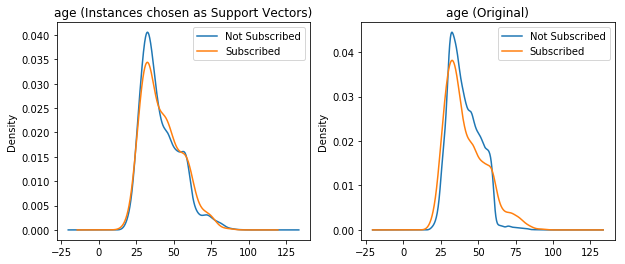

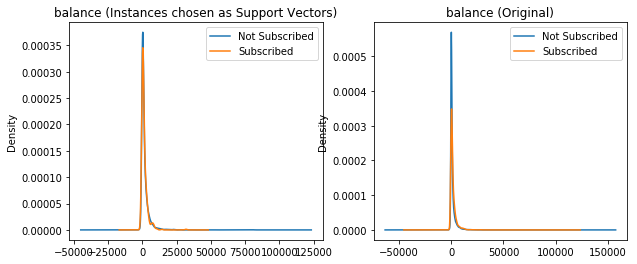

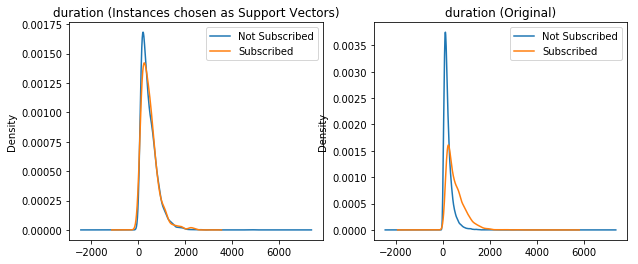

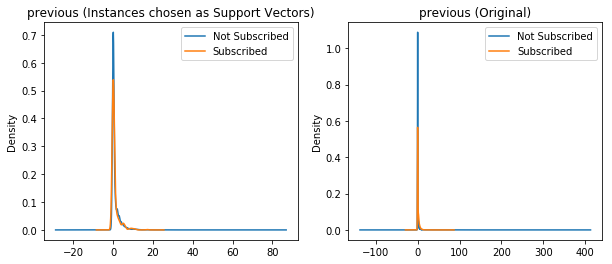

In [29]:
# now lets see the statistics of these attributes
#from pandas.tools.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['Subscribed'])
df_grouped = bankPromo_imputed.groupby(['Subscribed'])

# plot KDE of Different variables
vars_to_plot = ['age', 'balance', 'duration','previous']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Not Subscribed','Subscribed'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Not Subscribed','Subscribed'])
    plt.title(v+' (Original)')

Based on the visual examination of the plots, the original data and support vectors look very close. Actually the separation is lot greater in the original data than what is shown in the plots. The reason is that the support vector instances are the data points that are only on the edge of the class boundary and classified incorrectly. 